<a href="https://colab.research.google.com/github/ktsiol1/EKPA/blob/main/DarkNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Src_Port  Dst_Port  Protocol  Flow_Duration  Total_Fwd_Packet  \
0     57158       443         6            229                 1   
1     57159       443         6            407                 1   
2     57160       443         6            431                 1   
3     49134       443         6            359                 1   
4     34697     19305         6       10778451               591   

   Total_Bwd_packets  Total_Length_of_Fwd_Packet  Total_Length_of_Bwd_Packet  \
0                  1                           0                           0   
1                  1                           0                           0   
2                  1                           0                           0   
3                  1                           0                           0   
4                400                       64530                        6659   

   Label-1  
0  Non-Tor  
1  Non-Tor  
2  Non-Tor  
3  Non-Tor  
4  Non-Tor  
<class 'pandas.core.frame.DataFr

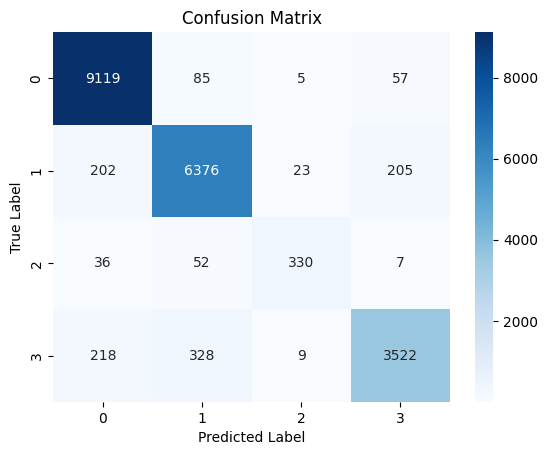

In [ ]:
# Εισαγωγή Βιβλιοθηκών
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Χρήση συγκεκριμένων dtypes για μείωση της χρήσης μνήμης
dtypes = {
    'Src_Port': 'int32',
    'Dst_Port': 'int32',
    'Protocol': 'int32',
    'Flow_Duration': 'int64',
    'Total_Fwd_Packet': 'int32',
    'Total_Bwd_packets': 'int32',
    'Total_Length_of_Fwd_Packet': 'int64',
    'Total_Length_of_Bwd_Packet': 'int64',
    # Προσθέστε άλλες στήλες με ανάλογα dtypes
    'Label-1': 'category'
}

# Φόρτωση δεδομένων από URL με επιλεγμένες στήλες και τύπους δεδομένων
use_cols = ['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Total_Fwd_Packet',
            'Total_Bwd_packets', 'Total_Length_of_Fwd_Packet', 'Total_Length_of_Bwd_Packet',
            # Προσθέστε άλλες στήλες όπως απαιτείται
            'Label-1']

url = 'https://github.com/kdemertzis/EKPA/blob/main/Data/DarkNet.csv?raw=true'
data = pd.read_csv(url, usecols=use_cols, dtype=dtypes, low_memory=False)

# Εξερεύνηση Δεδομένων
print(data.head())
print(data.info())

# Επιλογή Ετικέτας Στόχου
target_column = 'Label-1'

# Διαχωρισμός σε χαρακτηριστικά και στόχο
# Απομάκρυνση αχρείαστων στηλών και ετικέτας στόχου
X = data.drop([target_column], axis=1)
y = data[target_column]

# Μετατροπή της ετικέτας σε κατηγορία για ταξινόμηση
y = y.cat.codes

# Αντιμετώπιση μη αριθμητικών στηλών με get_dummies
X = pd.get_dummies(X)

# Διαχωρισμός δεδομένων σε εκπαίδευση και δοκιμή
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Εκπαίδευση Μοντέλου
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Πρόβλεψη και Αξιολόγηση
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Οπτικοποίηση Αποτελεσμάτων
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()